Program: 02_clustering.R  
Date: July 3, 2019  
Programmer: Hillary Mulder  
Purpose: Use clustering techniques for BP type identification

In [2]:
data=read.csv("/mnt/workspace/DCRI/Data/analysis_ds.csv")
data=data[which(data$train==1),]
colnames(data)
dim(data)

[1] "person_id"  "age"        "Sex"        "Race"       "Race2"     
 [6] "BMI"        "weight"     "height"     "Toba"       "Htn"       
[11] "HxDM"       "HxMIStr"    "revasc"     "BP.s"       "BP.d"      
[16] "LDL"        "HDL"        "TChol"      "Trig"       "HMG"       
[21] "asprin"     "antihyp"    "MI"         "HxStr"      "CABG"      
[26] "PCI"        "Loop"       "thiazide"   "KDiur"      "ARB"       
[31] "AceI"       "Dihy"       "nonDihy"    "BetaB"      "rese"      
[36] "othBPmed"   "ONitra"     "nslNitrate" "TZD"        "VASO"      
[41] "Cent"       "AlphaB"     "K"          "dthDays"    "dthStat"   
[46] "study"      "studyIDI"   "DIUR"       "CaCB"       "study.1"   
[51] "type_hyp"   "death"      "tdeath"     "train"      "test"

[1] 30514    55

Hierarchical clustering with baseline characteristics - Need to identify the optimal linkage type and number of clusters

In [8]:
base_nmiss=data[complete.cases(data[, c(1:3, 5, 6, 9:19, 20:22, 50, 51)]), c(1:3, 5, 6, 9:19, 20:22, 50, 51)]
base_nmiss$studyn=as.numeric(base_nmiss$study.1)
base_nmiss=base_nmiss[, -c(7,8,20,21,22)]
summary(base_nmiss)
nrow(base_nmiss)
#set.seed(120)
#rs=sample_n(base_nmiss, size=1500, replace=F)
#nrow(rs)

   person_id             age            Sex            Race2      
 Min.   :21100001   Min.   :40.0   Min.   :1.000   Min.   :1.000  
 1st Qu.:21108700   1st Qu.:59.1   1st Qu.:1.000   1st Qu.:1.000  
 Median :23003778   Median :64.3   Median :1.000   Median :1.000  
 Mean   :22378926   Mean   :65.1   Mean   :1.392   Mean   :1.256  
 3rd Qu.:23015464   3rd Qu.:70.2   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :24004994   Max.   :90.0   Max.   :2.000   Max.   :2.000  
      BMI             Toba           HxMIStr           revasc      
 Min.   :11.58   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:26.61   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :29.96   Median :1.0000   Median :0.0000   Median :0.0000  
 Mean   :30.66   Mean   :0.5106   Mean   :0.2814   Mean   :0.2466  
 3rd Qu.:34.08   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :70.70   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
      BP.s            BP.d             LDL             

[1] 24671

In [5]:
m = c("average", "single", "complete", "ward")
names(m) = c("average", "single", "complete", "ward")
#ac=function(x){
#    agnes(rs, method=x)$ac
#}
#map_dbl(m, ac)
#hc=agnes(rs, method='ward')
#pltree(hc, cex=0.6, hang=-1, main='Dendrogram of AGNES')

In [9]:
d=dist(base_nmiss, method='euclidean')
hc2=hclust(d, method='ward.D2')


sub_grp
    1     2     3 
 3102 14299  7270 

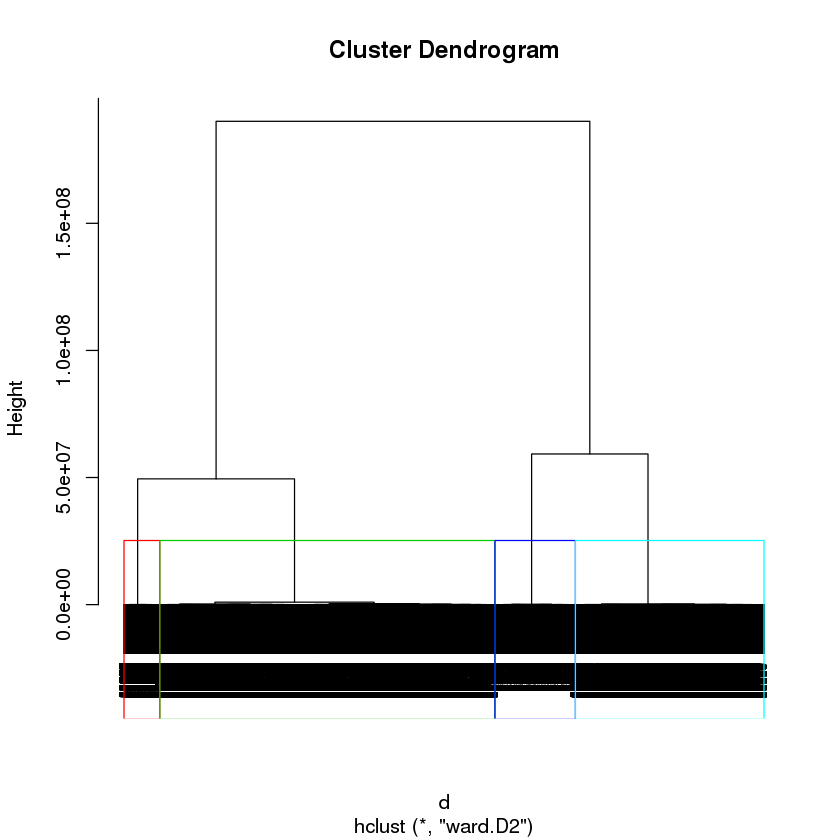

In [10]:
sub_grp = cutree(hc2, k=3)
table(sub_grp)
plot(hc2, cex=0.6, xaxt='n')
rect.hclust(hc2, k=4, border=2:5)